In [55]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import pywt
from pygasp import dwt

from dspUtil import *
from matplotlibUtil import *

from scipy import signal


In [56]:
init_notebook_mode(connected=True)

In [57]:
# Enter gender and age (in this case, my own informations)
gender = 'FEMALE'
#gender = 'MALE'
age = 23

In [58]:
# Calculating maximum frequency (Fmax)
def fmax(gender, age):
    if gender == "MALE":
        fmax = 220 - age
    
    else:
        fmax = 226 - age
    
    return fmax

In [59]:
# My Fmax
fmax = fmax(gender,age)
print fmax

203


In [60]:
def rr_to_bpm(frequencies):
    for i in range(len(frequencies)):
        if frequencies[i] != 0:
            bpm = (frequencies[i]**(-1))*1000*60
            bpm_values.append(bpm)
    
    return bpm_values

In [61]:
# Open archive
archive = open('median_filter_teste01.txt', 'r')
text = archive.readlines()

In [62]:
# Identifying tachycardia
frequencies = []

for line in text:
    frequencies.append(int(line))

#print frequencies    
    
bpm_values=[]
bpm_values = rr_to_bpm(frequencies)

for i in range(len(bpm_values)):
    if bpm_values[i] > 100:
        print "Tachycardia in " + str(i) + "!"

Tachycardia in 176!
Tachycardia in 177!
Tachycardia in 200!
Tachycardia in 201!
Tachycardia in 203!


In [63]:
# Plotting tachycardia

axis_x = np.linspace(0, (len(bpm_values))-1, len(bpm_values))
axis_y = bpm_values

colors = []
for i in range(len(bpm_values)):
    colors.append('rgb(22, 96, 167)')

for i in range(len(bpm_values)):
    if bpm_values[i] > 100:
        colors[i] = str('rgb(205, 12, 24)')


trace = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode='lines+markers',
    marker=dict(color=(colors))
)
layout = go.Layout(
    xaxis=dict(
        title='Samples'
        ),
    yaxis=dict(
        title='Frequency (bpm)'
        )
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-line')

In [64]:
# Identifying bradycardia
frequencies = []

for line in text:
    frequencies.append(int(line))

bpm_values=[]
bpm_values = rr_to_bpm(frequencies)

for i in range(len(bpm_values)):
    if bpm_values[i] < 60:
        print "Badycardia in " + str(i) + "!"

In [65]:
# Plotting bradycardia

axis_x = np.linspace(0, (len(bpm_values))-1, len(bpm_values))
axis_y = bpm_values

colors = []
for i in range(len(bpm_values)):
    colors.append('rgb(22, 96, 167)')

for i in range(len(bpm_values)):
    if bpm_values[i] < 60:
        colors[i] = str('rgb(255, 210, 0)')


trace = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode='lines+markers',
    marker=dict(color=(colors))
)

data = [trace]

iplot(data, filename='basic-line')

In [66]:
# Plotting bradycardia and tachycardia events

axis_x = np.linspace(0, (len(bpm_values))-1, len(bpm_values))
axis_y = bpm_values

colors = []
for i in range(len(bpm_values)):
    colors.append('rgb(22, 96, 167)')

    
for i in range(len(bpm_values)):
    if bpm_values[i] > fmax:
        colors[i] = 'rgb(205, 12, 24)'
    elif bpm_values[i] > 100:
        colors[i] = 'rgb(255, 100, 0)'
    elif bpm_values[i] < 60:
        colors[i] = 'rgb(255, 210, 0)'


trace = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode='lines+markers',
    marker=dict(color=(colors))
)

layout = go.Layout(
    xaxis=dict(
        title='Samples'
        ),
    yaxis=dict(
        title='Frequency (bpm)'
        )
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-line')

In [67]:
def moving_stdeviation(a, n, colors):
    wi = 0
    wf = n
    j = n
    while j < a.size:
        window = a[wi:wf]
        std_window = np.std(window)
        #print "WINDOW: " +  str(window)
        #print "STD: " + str(std_window)
        if std_window > 5:
            i = wi
            while i < wf:
                colors[i] = 'rgb(115, 70, 35)'
                i = i + 1
                
        wi = wi + 1
        wf = wf + 1
        j = j + 1
    return colors


In [68]:
# Identifying sinus arrhythmia

bpm_values = []
bpm_values = rr_to_bpm(frequencies)

bpm_np = np.array(bpm_values)

colors = []

for i in range(len(bpm_values)):
    colors.append('rgb(22, 96, 167)')

colors = moving_stdeviation(bpm_np, 50, colors)

trace = go.Scatter(
    x = axis_x,
    y = axis_y,
    mode='lines+markers',
    marker=dict(color=(colors))
)

data = [trace]

iplot(data, filename='basic-line')

In [69]:
fig_size = [0,0]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

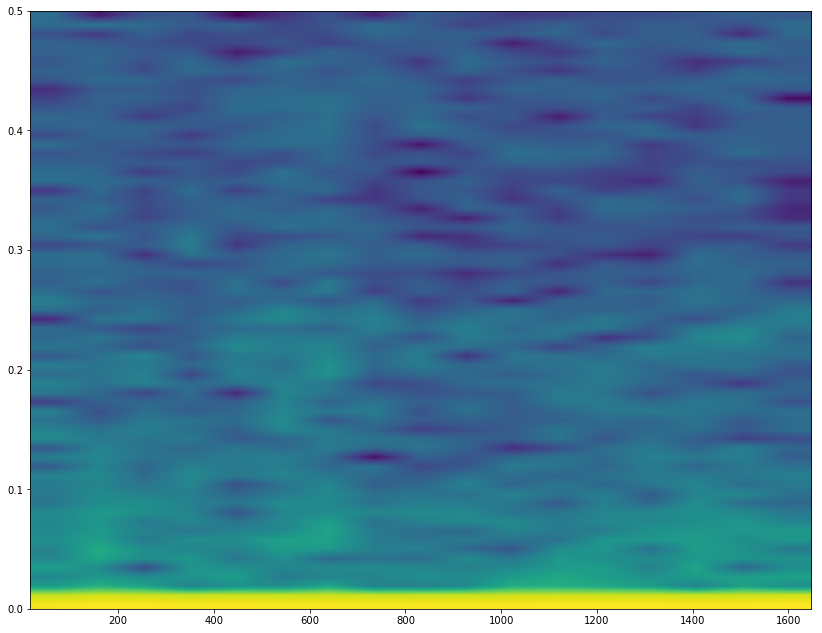

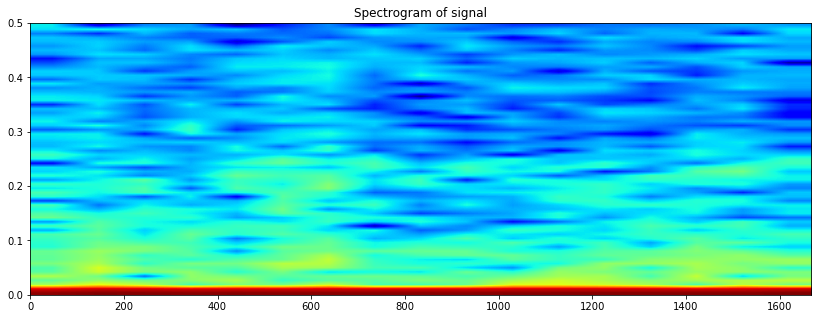

In [70]:
#scikit learning
x = np.linspace(0, (bpm_np.size)-1, bpm_np.size)
data = bpm_np

wavelet = 'db3'
level = 3
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.jet


# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)


# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=128, mode = 'magnitude', noverlap=32, Fs=1, xextent = (0, data.size), cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")


plt.show()

In [71]:
spec, freq, time, im = plt.specgram(bpm_np, NFFT=128, mode = 'magnitude', noverlap=32, Fs=1, interpolation='bilinear')

#for i in range(len(spec)):
#    print spec[i]

spec = np.delete(spec, 0, 0)
spec = np.delete(spec, 0, 0)
spec = np.delete(spec, 0, 0)

data = [
    go.Surface(
        z=spec,
        colorscale = 'Jet'
    )
]
layout = go.Layout(
    title='SPECTROGRAM',
    autosize=True
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')